In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/subsample.csv')
G = nx.read_gml('../network/reviews_network.gml')

In [3]:
G.number_of_edges()

172994

In [4]:
G.number_of_nodes()

17339

In [5]:
u, v, data = list(G.edges(data=True))[0]
data

{'rating': 5, 'neg': 0.028, 'neu': 0.87, 'pos': 0.102, 'compound': 0.7089}

In [6]:
df.head()

,rating,parent_asin,user_id,main_category,average_rating,rating_number,price,categories,neg,neu,pos,compound
0,5,B095LLDH4H,AFSKPY37N3C43SOI5IEXEK5JSIYA,all electronics,4.6,5564.0,17.97,"['electronics', 'power accessories', 'power co...",0.028,0.870,0.102,0.7089
1,4,B0787GLJNQ,AFSKPY37N3C43SOI5IEXEK5JSIYA,computers,4.4,18317.0,11.99,"['electronics', 'computers & accessories', 'co...",0.040,0.632,0.329,0.9432
2,4,B075QC3TZY,AFSKPY37N3C43SOI5IEXEK5JSIYA,cell phones & accessories,3.1,1833.0,12.46,"['electronics', 'gps, finders & accessories', ...",0.000,0.909,0.091,0.9432
3,3,B00GXXJF72,AFSKPY37N3C43SOI5IEXEK5JSIYA,computers,4.1,1630.0,119.99,"['electronics', 'computers & accessories', 'co...",0.073,0.824,0.103,0.7416
4,5,B003VAGXZC,AFSKPY37N3C43SOI5IEXEK5JSIYA,all electronics,4.5,12006.0,29.99,"['electronics', 'computers & accessories', 'co...",0.078,0.751,0.171,0.9496


In [7]:
G.nodes[[n for n, d in G.nodes(data=True) if d['type'] == 'product'][0]]

{'type': 'product',
 'main_category': 'all electronics',
 'average_rating': 4.6,
 'rating_number': 5564.0,
 'price': '17.97'}

In [8]:
print( G.nodes[[n for n, d in G.nodes(data=True) if d['type'] == 'user'][0]])

{'type': 'user'}


<Axes: title={'center': 'pos'}, xlabel='rating'>

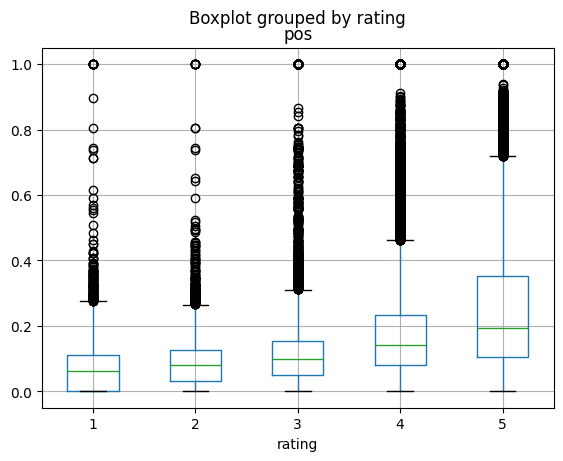

In [9]:
df.boxplot(column=['pos'], by='rating') 

<Axes: title={'center': 'neg'}, xlabel='rating'>

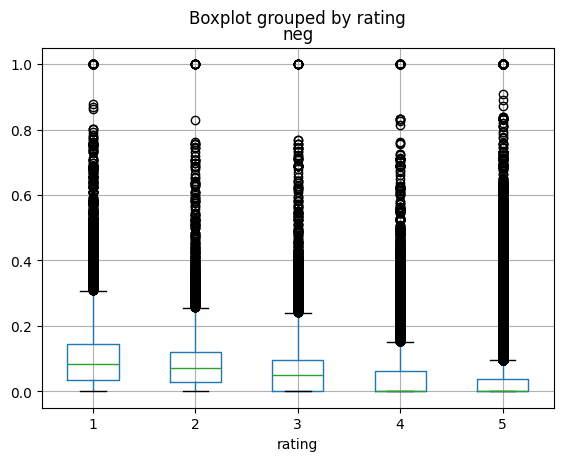

In [12]:
df.boxplot(column=['neg'], by='rating') 

<Axes: title={'center': 'neu'}, xlabel='rating'>

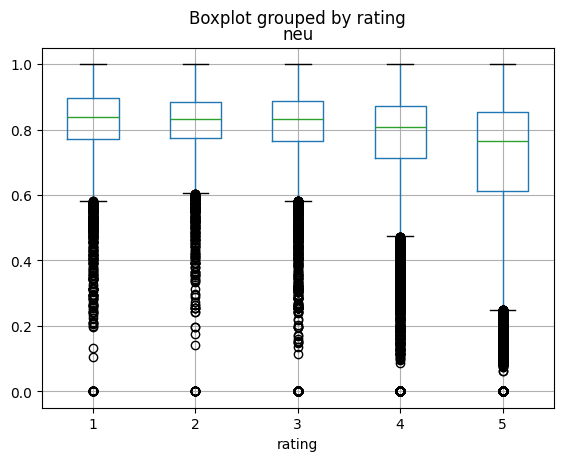

In [10]:
df.boxplot(column=['neu'], by='rating') 

<Axes: title={'center': 'compound'}, xlabel='rating'>

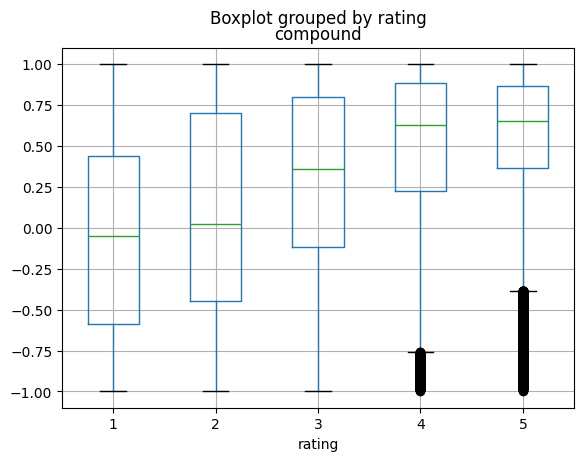

In [11]:
df.boxplot(column=['compound'], by='rating') 

<Axes: title={'center': 'rating_number'}, xlabel='rating'>

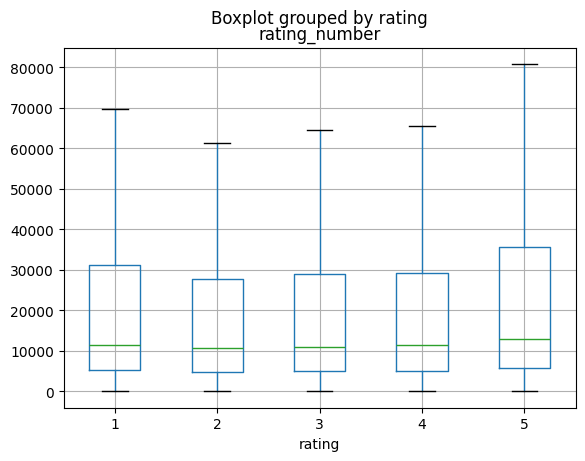

In [12]:
df.boxplot(column=['rating_number'], by='rating',  showfliers=False) 

<Axes: title={'center': 'price'}, xlabel='rating'>

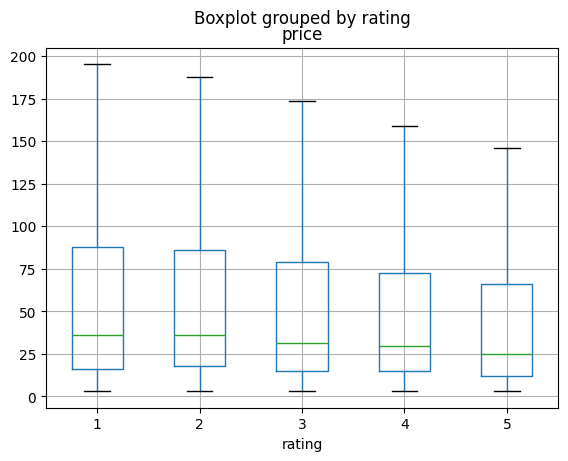

In [13]:
df.boxplot(column=['price'], by='rating', showfliers=False) 

<Axes: title={'center': 'average_rating'}, xlabel='rating'>

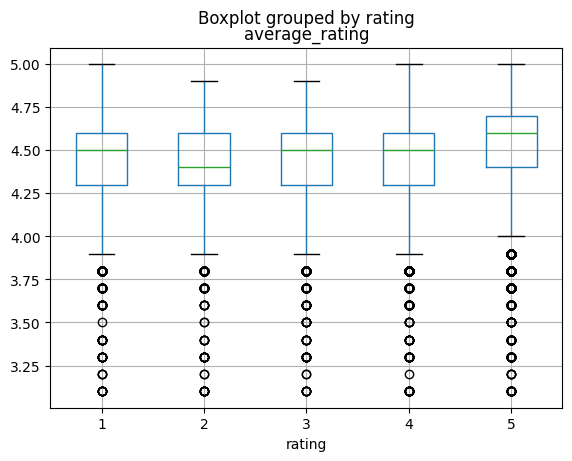

In [14]:
df.boxplot(column=['average_rating'], by='rating') 

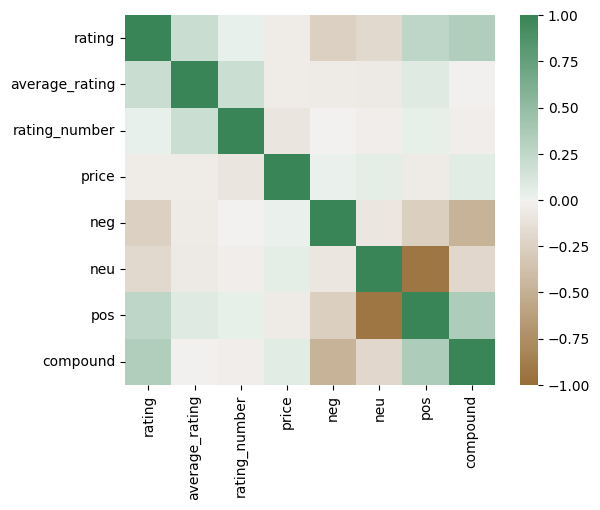

In [16]:
axis_corr = sns.heatmap(
df.drop(columns=['main_category', 'categories', 'parent_asin', 'user_id']).corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)